In [1]:
import pandas as pd
import sys

In [24]:
rotg=[pd.read_fwf('../data/'+str(year)+'.txt') for year in range(2000,2016)]

In [25]:
test=rotg[0]
df = pd.DataFrame(test.NAME.str.split(' ',1).tolist(),
                                   columns = ['FIRST_NAME','LAST_NAME'])

print test.columns
test=test.drop('NAME',1)
test=test.join(df)

test.head()



Index([u'PLACE', u'NAME', u'AGE', u'SEX', u'CITY', u'ST', u'TIME', u'PACE'], dtype='object')


,PLACE,AGE,SEX,CITY,ST,TIME,PACE,FIRST_NAME,LAST_NAME
0,1,22,M,Albany,NY,19:52,4:58,Jeffrey,Brooks
1,2,24,M,Albany,NY,19:56,4:59,Nick,Conway
2,3,23,M,Schenectady,NY,20:22,5:06,Peter,Flynn
3,4,19,M,Albany,NY,20:33,5:09,Jaime,Rodriguez
4,5,17,M,West Sand Lake,NY,21:08,5:17,Tyson,Evensen


In [26]:
master=pd.DataFrame()
rotg2=[]
i=0 
year=2000

for i in range(len(rotg)):
    
    try :
        # handle NA
        rotg[i].NAME=rotg[i].NAME.fillna('No Name')
        rotg[i].ST=rotg[i].ST.fillna('NY')
        rotg[i].CITY=rotg[i].CITY.fillna('Albany')
        rotg[i].SEX=rotg[i].SEX.fillna('F')
        rotg[i].TIME=rotg[i].TIME.fillna('59:21.5')
        
        temp = pd.DataFrame(rotg[i].NAME.str.split(' ',1).tolist(),
                                   columns = ['FIRSTNAME','LASTNAME'])
        

        rotg[i]=rotg[i].drop('NAME',1)
        rotg[i]=rotg[i].join(temp)
        
    except :
        print "Unexpected error:", sys.exc_info()[0]
        pass
    newdf=rotg[i][['PLACE', 'FIRSTNAME', 'LASTNAME', 'AGE', 'SEX', 'CITY', 'ST', 'TIME']]
    newdf['YEAR']=[year]*len(newdf.PLACE)
    year=year+1
    master=master.append(newdf)
    i=i+1
    

Unexpected error: <type 'exceptions.AttributeError'>


/home/bnorthan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
master=pd.read_csv('../output/alltime.csv')
master.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME,YEAR
0,1,Chris,Hartshorn,31,M,Scenectady,NY,19:36,2003
1,1,Andy,Allstadt,26,M,Albany,NY,19:37,2009
2,2,Jamie,Rodriguez,21,M,Albany,NY,19:43,2003
3,1,Nick,Conway,30,M,Albany,NY,19:45,2006
4,2,Chuck,Terry,26,M,Albany,NY,19:45,2009


In [30]:
master=master.reset_index(drop=True)

In [31]:
# hack?? erase number 213??
master=master.drop(213)
master=master.reset_index(drop=True)

In [25]:
# first strip minutes and seconds
import datetime
import numpy as np

def convert(s): 
    try:
        time=datetime.datetime.strptime(s,'%M:%S')
    except:
        time=datetime.datetime.strptime(s,'%M:%S.%f')
    return time

master['TIMESTAMP'] = master.TIME.apply(lambda x: convert(x))
# create time delta by subtracting a base time
master.TIMESTAMP=master.TIMESTAMP - datetime.datetime.strptime('00:00.0','%M:%S.%f')

master.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME,YEAR,TIMESTAMP
0,1,Chris,Hartshorn,31,M,Scenectady,NY,19:36,2003,00:19:36
1,1,Andy,Allstadt,26,M,Albany,NY,19:37,2009,00:19:37
2,2,Jamie,Rodriguez,21,M,Albany,NY,19:43,2003,00:19:43
3,1,Nick,Conway,30,M,Albany,NY,19:45,2006,00:19:45
4,2,Chuck,Terry,26,M,Albany,NY,19:45,2009,00:19:45


In [32]:
# change times to timestamp
new_time=[]
for i in range(len(master.TIME)):
    if len(master.TIME[i].split(':'))==2:
        time_string='00:'+master.TIME[i]
    else:
        time_string=master.TIME[i]
        
    if (type(pd.to_datetime(time_string))!=pd.tslib.Timestamp):
        time_stamp=pd.to_datetime('00:40:00')
    else:
        time_stamp=pd.to_datetime(time_string)
    
    new_time.append(time_stamp)

master['TIMESTAMP']=new_time

In [33]:
# sanity check --> look at min and max of all fields

print master.TIMESTAMP.min()
print master.TIMESTAMP.max()

print master.AGE.min()
print master.AGE.max()

print master.TIME.min()
print master.TIME.max()

print master.FIRSTNAME.min()
print master.FIRSTNAME.max()

print master.LASTNAME.min()
print master.LASTNAME.max()

print master.ST.min()
print master.ST.max()

print master.CITY.min()
print master.CITY.max()

print master.YEAR.min()
print master.YEAR.max()

print master.PLACE.min()
print master.PLACE.max()

print master.SEX.min()
print master.SEX.max()


#master=master.drop('ST',1)

2016-03-18 00:19:36
2016-03-18 00:59:21.500000
6.0
85.0
19:36
59:21.5
3
susan
A Parente
von Maltzahn
inf
VT
inf
wynantskill
2000
2016
1
659
F
M


In [34]:
# sort by time
master=master.sort('TIMESTAMP')
master.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME,YEAR,TIMESTAMP
0,1,Chris,Hartshorn,31,M,Scenectady,NY,19:36,2003,2016-03-18 00:19:36
1,1,Andy,Allstadt,26,M,Albany,NY,19:37,2009,2016-03-18 00:19:37
2,2,Jamie,Rodriguez,21,M,Albany,NY,19:43,2003,2016-03-18 00:19:43
3,1,Nick,Conway,30,M,Albany,NY,19:45,2006,2016-03-18 00:19:45
4,2,Chuck,Terry,26,M,Albany,NY,19:45,2009,2016-03-18 00:19:45


In [114]:
import numpy as np
from bokeh.models import HoverTool
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.models import ColumnDataSource, HoverTool, HBox, VBoxForm
from bokeh.io import curdoc

from bokeh.plotting import Figure, ColumnDataSource, show, output_file

output_file('../output/alltime.html',"All Time ROTG Finishers")

min_year = Slider(title="Start Year", start=2000, end=2015, value=2000, step=1)
max_year = Slider(title="End Year", start=2000, end=2015, value=2015, step=1)

master["color"] = np.where(master["SEX"] == 'F', "red", "blue")

p = Figure(plot_width=1400, plot_height=800, y_axis_type='datetime')

source = ColumnDataSource(data=master)
#source=ColumnDataSource(data=master)

s1=p.scatter('AGE', 'TIMESTAMP', source =  source, color=master.color, size=15, alpha=0.5)

hover = HoverTool()
hover.tooltips = [('First Name', '@FIRSTNAME'), ('Last Name', '@LASTNAME'), ('Time', '@TIME'), ('Year', '@YEAR'), ('Age', '@AGE')]
p.add_tools(hover)

p.title="Runnin' of the Green All Time Finishers"
p.xaxis.axis_label="Age"
p.yaxis.axis_label="Time"

#controls = [min_year, max_year]
#for control in controls:
#    control.on_change('value', update)

    
#inputs = HBox(VBoxForm(*controls), width=300)
#update(None, None, None) # initial load of the data
#curdoc().add_root(inputs)
#curdoc().add_root(HBox(inputs, p, width=1100))
#curdoc().add_root(p)

show(p)

In [83]:
malerecords=pd.DataFrame()
femalerecords=pd.DataFrame()

for age in range(1,90):
    
    males=master[(master.AGE==age)&(master.SEX=='M')].sort('TIMESTAMP')
    females=master[(master.AGE==age)&(master.SEX=='F')].sort('TIMESTAMP')
    
    if males.shape[0]>0:
        malerecords=malerecords.append(males.iloc[0])
    
    if females.shape[0]>0:    
        femalerecords=femalerecords.append(females.iloc[0])
    
    #if (aged.shape[0]>0):
    #    ager=aged.iloc[0]
    #    print age,":",ager.FIRSTNAME,ager.LASTNAME,ager.TIME,ager.YEAR

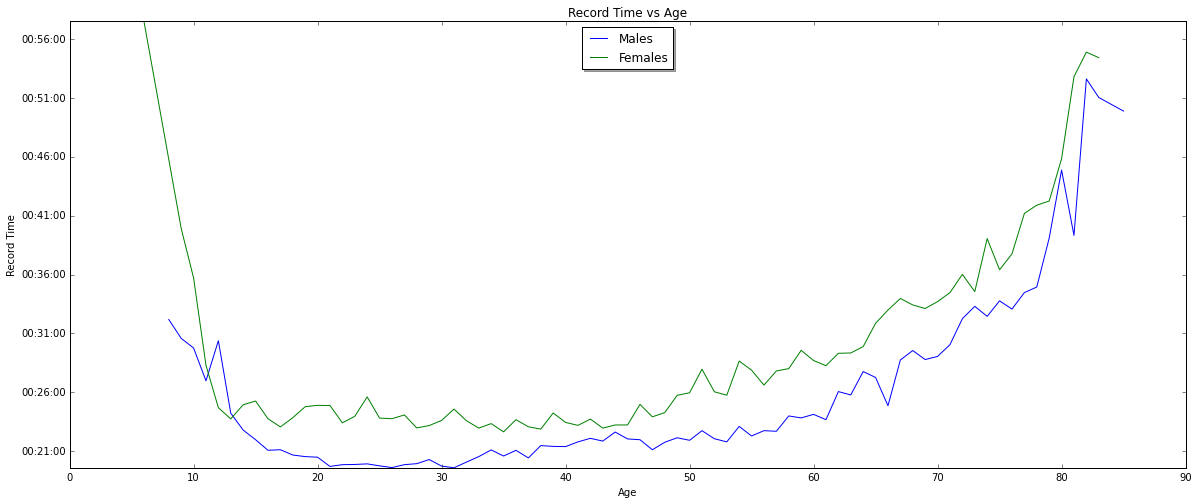

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.plot(malerecords.AGE, malerecords.TIMESTAMP, label='Males')
ax.plot(femalerecords.AGE, femalerecords.TIMESTAMP, color='g', label='Females')

ax.set_title('Record Time vs Age')
ax.set_ylabel('Record Time')
ax.set_xlabel('Age')

legend = ax.legend(loc='upper center', shadow=True)


In [104]:
joined=pd.merge(malerecords[['FIRSTNAME','LASTNAME','AGE','TIME']], femalerecords[['FIRSTNAME','LASTNAME','AGE','TIME']], on='AGE', how='outer')

joined.columns = ['male-First', 'male-Last', 'Age', 'male-Record','female-First', 'female-Last', 'female-Record']

joined = joined[['Age','male-First', 'male-Last', 'male-Record','female-First', 'female-Last', 'female-Record']]
joined=joined.sort('Age')

In [113]:
f = open('../output/alltimetable.html','w')

message = """<html>
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="chrome=1">
    <title>Runnin' of the Green: Records by age</title>

    <link rel="stylesheet" href="stylesheets/styles.css">
    <link rel="stylesheet" href="stylesheets/github-light.css">
    <meta name="viewport" content="width=device-width">
    <!--[if lt IE 9]>
    <script src="//html5shiv.googlecode.com/svn/trunk/html5.js"></script>
    <![endif]-->
  </head>
<body><h1>Runnin' of the Green Records by Age</h1>"""

message=message+"""<div style="text-align: center; width: 100%; border: 1px solid black;"><img src='alltime.png'></div><br><br>"""

message=message+joined.to_html(index=False)

message=message+"""</body></html>"""

f.write(message)
f.close()

In [71]:
### Scraps --> Trying for interactive plot --> revisit

def update(attrname, old, new):
    df = select_runners()
    
    source.data = dict(
        x=df['AGE'],
        y=df['TIMESTAMP'],
        year=df["YEAR"])
        
    

In [ ]:
### Scraps --> Trying for interactive plot --> revisit

import numpy as np
from bokeh.models import HoverTool
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.models import ColumnDataSource, HoverTool, HBox, VBoxForm
from bokeh.io import curdoc

from bokeh.plotting import Figure, ColumnDataSource, show, output_file

output_file('best.html',"test")

min_year = Slider(title="Year released", start=2000, end=2015, value=2000, step=1)
max_year = Slider(title="End Year released", start=2000, end=2015, value=2015, step=1)

p = Figure(plot_width=1400, plot_height=800)

x=[1,2,3]
y=[1,2,3]

s1=p.circle(x, y)

curdoc().add_root(p)

#show(p)